# Generating Closure Phases from Visibility Data
In this notebook I show how to generate closure phases directly from HERA visibilities.

In [2]:
import os
import sys
sys.path.append('/users/pkeller/code/H6C/') # set this to your code directory

import h5py
import hdf5plugin
import numpy as np
from closurelib import clquants 

import matplotlib.pyplot as plt

In [12]:
# path to HERA uvh5 file
visfile = "/lustre/aoc/projects/hera/pkeller/data/H6C/tmp/2459862/zen.2459862.59668.sum.uvh5"
fldir = "/lustre/aoc/projects/hera/h6c-analysis/IDR2/"

antfpath = os.path.join(fldir, "2459862", "zen.2459862.59668.sum.antenna_flags.h5")
wfpath = os.path.join(fldir, "2459862", "zen.2459862.59668.sum.flag_waterfall.h5")

# time index
time_idx = 0

# read uvh5
f = h5py.File(visfile, "r+")
antf = h5py.File(antfpath, "r")
wff = h5py.File(wfpath, "r")

# generate closure phase data. This takes about 90 s for one triad.
cp = clquants.closurePh(f, time_idx, trlist=[[5, 16, 17]], antf=antf, wff=wff)

# 1 triad, 1536 channels, 2 polarisations
print(cp["phase"].shape, cp["flags"].shape, cp["wf"].shape)

(1536, 2) 1 1 1 1
(1, 1536, 2) (1, 1536, 2) (1536, 2)


In [14]:
wf = np.repeat(np.expand_dims(cp["wf"], axis=0), cp["phase"].shape[0], axis=0)
cph = np.ma.array(cp["phase"], mask=cp["flags"] | wf)

## Plot

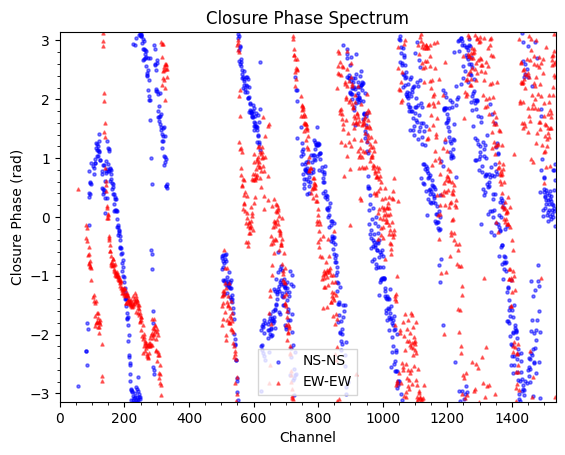

In [15]:
channels = np.arange(cph.shape[1])

plt.title("Closure Phase Spectrum")

# NS-NS polarisation product
plt.scatter(channels, cph[0, ..., 0], alpha=0.5, color="b", marker="o", s=5, label="NS-NS")

# EW-EW polarisation product
plt.scatter(channels, cph[0, ..., 1], alpha=0.5, color="r", marker="^", s=5, label="EW-EW")

# axis limits
plt.xlim([0, cph.shape[1]])
plt.ylim([-np.pi, np.pi])

plt.xlabel("Channel")
plt.ylabel("Closure Phase (rad)")

plt.minorticks_on()
plt.legend(fancybox=False)